In [60]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [61]:
data = pd.read_csv('data.csv')

In [67]:
data=data.drop("Unnamed: 32", axis=1)

In [68]:
pd.set_option('display.max_columns', None)
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [69]:
data["diagnosis"] = data["diagnosis"].map({"B": 1, "M": 2})
features = data.drop(columns=['id', 'diagnosis'])
target = data['diagnosis']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [71]:
rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Random Forest Accuracy: {accuracy:.4f}')

Random Forest Accuracy: 0.9649


In [72]:
threshold = 0.02  # dyspersia
selector = VarianceThreshold(threshold=threshold)
features_reduced = selector.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(features_reduced, target, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Random forest Accuracy after low dyspersion: {accuracy:.4f}')

Random forest Accuracy after low dyspersion: 0.9737


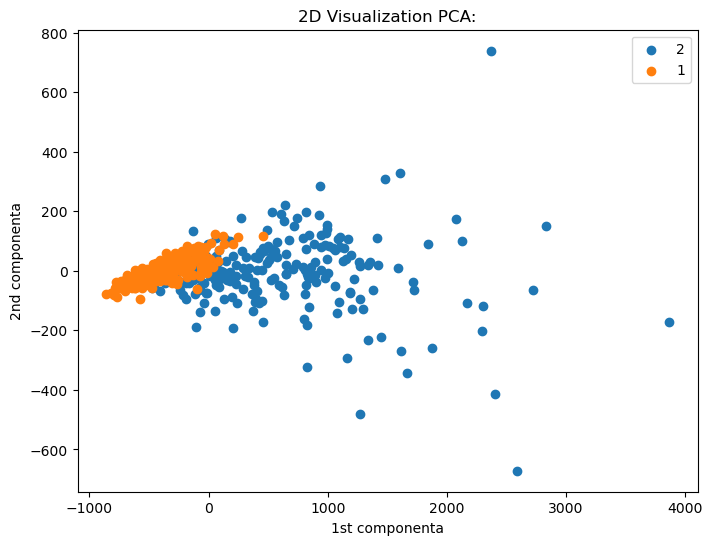

In [73]:
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features)

plt.figure(figsize=(8, 6))
for target_value in data['diagnosis'].unique():
    mask = (target == target_value)
    plt.scatter(features_pca[mask, 0], features_pca[mask, 1], label=target_value)

plt.xlabel('1st componenta')
plt.ylabel('2nd componenta')
plt.title('2D Visualization PCA:')
plt.legend()
plt.show()

In [75]:
import time
X_train, X_test, y_train, y_test = train_test_split(features_pca, target, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(random_state=42)
start_time = time.time()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
end_time = time.time()
accuracy = accuracy_score(y_test, y_pred)
elapsed_time = end_time - start_time

print(f'Random Forest Accuracy with two componentas: {accuracy:.4f}')
print(f'Time of search: {elapsed_time:.4f} s')


Random Forest Accuracy with two componentas: 0.9561
Time of search: 0.2242 s


How many for save 90% dyspersion: 1


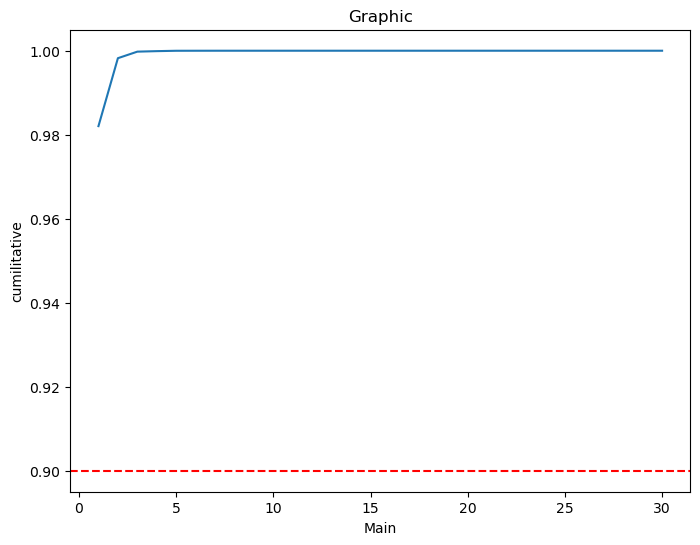

In [76]:
data["diagnosis"]=data["diagnosis"].map({"B": 1, "M": 2})
data.head()
features = data.drop(columns=['id', 'diagnosis'])
pca = PCA()
pca.fit(features)

cumulative_explained_variance = pca.explained_variance_ratio_.cumsum()

# To save 90% dyspersion
num_components = next(i for i, v in enumerate(cumulative_explained_variance) if v >= 0.9) + 1

print(f'How many for save 90% dyspersion: {num_components}')

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance)
plt.xlabel('Main')
plt.ylabel('cumilitative')
plt.title('Graphic')
plt.axhline(y=0.9, color='r', linestyle='--')
plt.show()

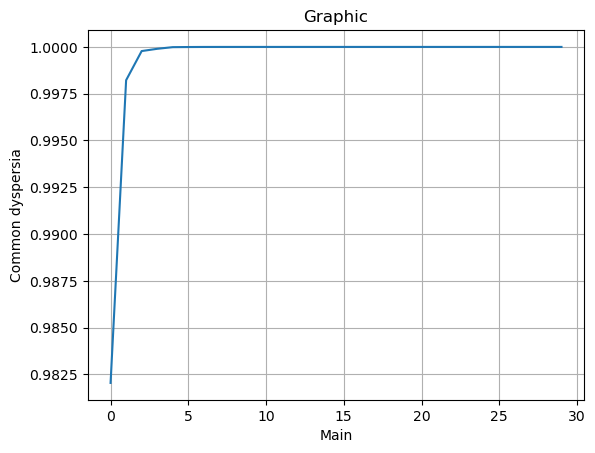

In [77]:
pca_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(pca_variance)
plt.xlabel('Main')
plt.ylabel('Common dyspersia')
plt.title('Graphic')
plt.grid(True)
plt.show()